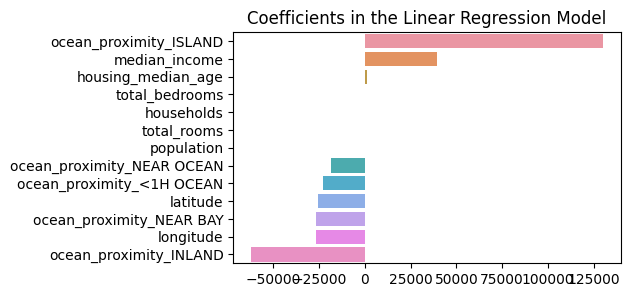

In [15]:
import pandas as pd 
from sklearn.linear_model import LinearRegression

df = pd.read_csv("housing.csv")
df = pd.concat([
    df.drop("ocean_proximity", axis=1),
    pd.get_dummies(df["ocean_proximity"], prefix="ocean_proximity")
], axis=1)
df = df.dropna()

lr = LinearRegression()
lr.fit(df.drop("median_house_value", axis=1), df["median_house_value"])

# barplot coefs
import matplotlib.pyplot as plt
import seaborn as sns

cols = df.drop("median_house_value", axis=1).columns
coefs = pd.Series(lr.coef_, index=cols)
# sort coefs
coefs = coefs.sort_values(ascending=False)
# horizontal barplot
plt.figure(figsize=(5, 3))
sns.barplot(x=coefs, y=coefs.index)
plt.title("Coefficients in the Linear Regression Model")
plt.show()

# save the coefs
import json
with open("coefs.json", "w") as f:
    coefs = coefs.to_dict()
    coefs["intercept"] = lr.intercept_
    json.dump(coefs, f)

In [14]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False
